## Toy Example of Perceptron
In this notebook I'll create a random linearly seperable data set and use a perceptron learning algorithm to find a separating plane. 

In [96]:
import matplotlib.pyplot as plt
import numpy as np
import numpy.random as r

First we need to set the size of the data. I'll stick with two features so that I can plot it.

In [97]:
nTrainingExamples = 10**4
nTestExamples = 10**2
nFeatures = 2

# Upper and Lower Bounds for the data
lb = -100
ub = 100

Now I'll choose the real weights that defines the separating plane that splits the data. 

In [98]:
trueWeights = r.uniform(lb, ub, [nFeatures,1])
print(trueWeights)

[[-24.22304576]
 [-50.09610743]]


In [99]:
# Creating Random Test and Training Data 
X_train = r.uniform(lb, ub, [nTrainingExamples, nFeatures])
y_train = (X_train.dot(trueWeights) >= 0).astype(int)

X_test = r.uniform(lb, ub, [nTestExamples, nFeatures])
y_test = (X_test.dot(trueWeights) >= 0).astype(int)

Let's take a look at the data. If we have a large number of training examples, the plot will be too crowded, so we define `R` to be a samplign factor so that we only plot one out of ever `R` Points. 

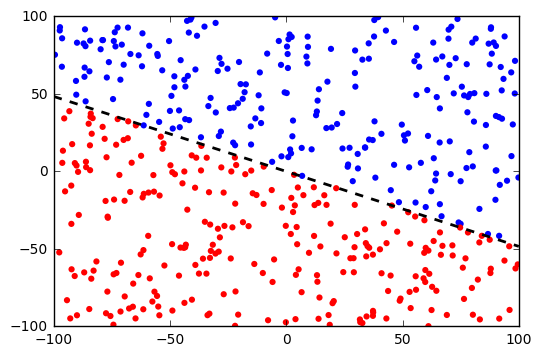

In [100]:
%matplotlib inline
R = int(np.ceil(nTrainingExamples/500.0))

# Plotting Data
plt.scatter(X_train[::R,0], X_train[::R,1], s=20, c=y_train[::R], cmap=plt.cm.bwr, lw = 0)
plt.xlim([lb,ub]); plt.ylim([lb,ub])

# Plotting True Separating Plane
slope = -trueWeights[0]/trueWeights[1]
plt.plot([lb,ub], [lb*slope, ub*slope], 'k--', lw=2)

In [93]:
# Initializing Weights
w = np.zeros([nFeatures,1])

# Training Perceptron
for i in range(nTrainingExamples):
    yi_hat = X_train[i,:].dot(w)
    if yi_hat >=0 and y_train[i]==0:
        w = w - X_train[i,:].reshape([nFeatures,1])
    elif yi_hat < 0 and y_train[i]==1:
        w = w + X_train[i,:].reshape([nFeatures,1])

# Calculating test outputs
y_hat = (X_test.dot(w) >= 0).astype(int)

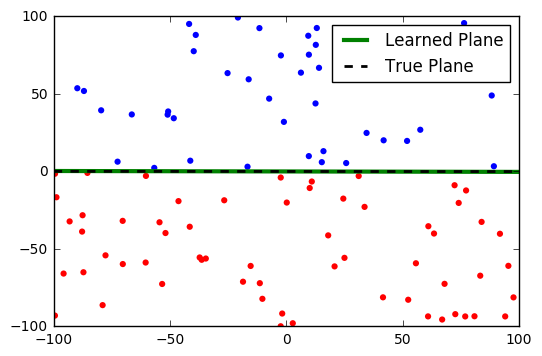

In [94]:
%matplotlib inline
R = int(np.ceil(nTestExamples/500.0))

# Plotting Data
plt.scatter(X_test[::R,0], X_test[::R,1], s=20, c=y_test[::R], cmap=plt.cm.bwr, lw = 0)
plt.xlim([lb,ub]); plt.ylim([lb,ub])

# Plotting True Separating Plane
learned_slope = -w[0]/w[1]
plt.plot([lb,ub], [lb*learned_slope, ub*learned_slope], 
         'g-', lw=3, label='Learned Plane')
plt.plot([lb,ub], [lb*slope, ub*slope], 'k--', lw=2, label='True Plane')
plt.legend()